# Compare regression results

Here we compare several regression models to check if the phenomenon is solid.

- Negative Binomial Generalized Linear Model(NBGLM)
- linear regression model on C (LM)
- linear regression model on the log of C+1 (LM_log)
- generalized linear model with a continuous lognormal distribution for the error terms on C+1 (GLM_log)


In [2]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
%matplotlib inline

In [31]:
# folders
project = 'MultipleAffiliations'
data_dir = f'D:/Data/{project}/data/'
result_dir = f'D:/Data/{project}/result/'
regression_nbglm_dir = f"{result_dir}/NBGLM/"
regression_glmlog_dir = f"{result_dir}/GLM_log/"
regression_lmlog_dir = f"{result_dir}/LM_log/"
regression_lm_dir = f"{result_dir}/LM/"

## Across disciplines

In [32]:
df_nbglm = pd.read_excel(f"{regression_nbglm_dir}/DIS.xlsx")
df_nbglm.head(2)

,Subject,Intercept,NM_mark,IM_mark,N_refs,N_ins,N_c,N_a,R-Squared,AIC,BIC
0,SPA,1.233***,-2.8,4.6**,1.3***,2.8***,2.7**,1.2**,0.15,160368.599478,-235810.907172
1,NEU,0.864***,5.9***,2.8*,1.1***,-0.6,13.2***,5.2***,0.13,457917.133530,-805136.814921


In [33]:
df_lmlog = pd.read_excel(f"{regression_lmlog_dir}/DIS.xlsx")
df_lmlog.head(2)

,Subject,Intercept,NM_mark,IM_mark,N_refs,N_ins,N_c,N_a,R-Squared,AIC,BIC
0,SPA,1.06***,-0.02,0.04**,0.01***,0.03***,0.04***,0.01***,0.17,65309.456183,65366.524185
1,NEU,0.81***,0.07***,0.04***,0.01***,-0.01***,0.11***,0.05***,0.14,195762.764419,195827.638157


In [34]:
df_lm = pd.read_excel(f"{regression_lm_dir}/DIS.xlsx")
df_lm.head(2)

,Subject,Intercept,NM_mark,IM_mark,N_refs,N_ins,N_c,N_a,R-Squared,AIC,BIC
0,SPA,1.02***,-0.37*,0.25,0.14***,0.26***,0.02,0.08,0.15,194938.572669,194995.640671
1,NEU,0.07,0.24***,-0.13,0.09***,0.01,0.99***,0.23***,0.11,566126.764207,566191.637946


In [35]:
df_glmlog = pd.read_excel(f"{regression_glmlog_dir}/DIS.xlsx")
df_glmlog.head(2)

,Subject,Intercept,NM_mark,IM_mark,N_refs,N_ins,N_c,N_a,R-Squared,AIC,BIC
0,SPA,2.024***,-11.0***,4.2*,0.4***,4.3***,-6.0***,2.0***,0.08,197027.322125,2.987198e+06
1,NEU,1.601***,5.7***,2.8*,0.4***,-0.5,13.4***,1.3***,0.07,569330.339264,5.736446e+06


In [36]:
## remove star

def remove_star(x):
    try:
        x = re.sub('\*','',x)
        return float(x)
    except:
        return 0

for df in [df_nbglm,df_lmlog]:
    for var in [ 'Intercept', 'NM_mark', 'IM_mark', 'N_refs', 'N_ins', 'N_c','N_a']:
        df[var] = df[var].apply(lambda x:remove_star(x))

In [37]:
df_lmlog.head(2)

,Subject,Intercept,NM_mark,IM_mark,N_refs,N_ins,N_c,N_a,R-Squared,AIC,BIC
0,SPA,1.06,-0.02,0.04,0.01,0.03,0.04,0.01,0.17,65309.456183,65366.524185
1,NEU,0.81,0.07,0.04,0.01,-0.01,0.11,0.05,0.14,195762.764419,195827.638157


In [38]:
df_com = pd.merge(df_nbglm,df_lmlog,on='Subject')

In [39]:
df_com.head(2)

,Subject,Intercept_x,NM_mark_x,IM_mark_x,N_refs_x,N_ins_x,N_c_x,N_a_x,R-Squared_x,AIC_x,...,Intercept_y,NM_mark_y,IM_mark_y,N_refs_y,N_ins_y,N_c_y,N_a_y,R-Squared_y,AIC_y,BIC_y
0,SPA,1.233,-2.8,4.6,1.3,2.8,2.7,1.2,0.15,160368.599478,...,1.06,-0.02,0.04,0.01,0.03,0.04,0.01,0.17,65309.456183,65366.524185
1,NEU,0.864,5.9,2.8,1.1,-0.6,13.2,5.2,0.13,457917.133530,...,0.81,0.07,0.04,0.01,-0.01,0.11,0.05,0.14,195762.764419,195827.638157


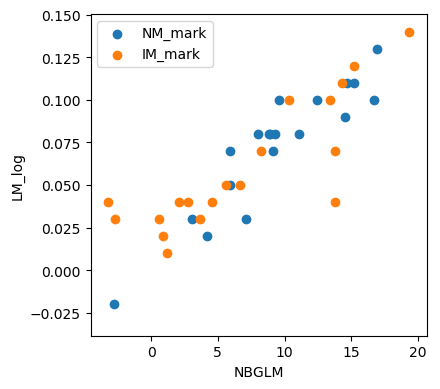

In [40]:
# figure: correlation for NM_mark

fig = plt.figure(figsize=(4.5,4),dpi=100)
ax = plt.subplot(111)
var = 'NM_mark'
ax.scatter(df_com[f"{var}_x"],df_com[f"{var}_y"],label=var)

var = 'IM_mark'
ax.scatter(df_com[f"{var}_x"],df_com[f"{var}_y"],label=var)


ax.set_xlabel('NBGLM')
ax.set_ylabel('LM_log')
ax.legend()

plt.tight_layout()

In [41]:
# correlation across all the factors
for var in [ 'Intercept', 'NM_mark', 'IM_mark', 'N_refs', 'N_ins', 'N_c','N_a']:
    cor = np.corrcoef(df_com[f"{var}_x"],df_com[f"{var}_y"])[0,1]
    print(f"{var}:{cor:.2f}")

Intercept:0.98
NM_mark:0.92
IM_mark:0.84
N_refs:0.85
N_ins:0.98
N_c:0.62
N_a:0.91


### AIC, BIC and $R^2$

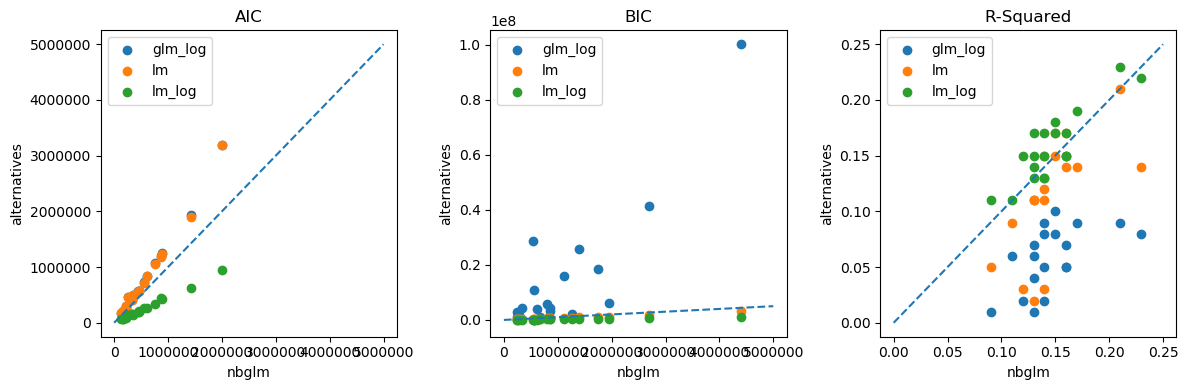

In [48]:
fig = plt.figure(figsize=(12,4),dpi=100)
ax = plt.subplot(131)
ax.scatter(df_nbglm['AIC'],df_glmlog['AIC'],label='glm_log')
ax.scatter(df_nbglm['AIC'],df_lm['AIC'],label='lm')
ax.scatter(df_nbglm['AIC'],df_lmlog['AIC'],label='lm_log')
ax.plot([0,5e6],[0,5e6],'--')
ax.set_title('AIC')
ax.set_xlabel('nbglm')
ax.set_ylabel('alternatives')
ax.legend()

ax = plt.subplot(132)
ax.scatter(-df_nbglm['BIC'],df_glmlog['BIC'],label='glm_log')
ax.scatter(-df_nbglm['BIC'],df_lm['BIC'],label='lm')
ax.scatter(-df_nbglm['BIC'],df_lmlog['BIC'],label='lm_log')
ax.plot([0,5e6],[0,5e6],'--')
ax.set_title('BIC')
ax.set_xlabel('nbglm')
ax.set_ylabel('alternatives')
ax.legend()

ax = plt.subplot(133)
ax.scatter(df_nbglm['R-Squared'],df_glmlog['R-Squared'],label='glm_log')
ax.scatter(df_nbglm['R-Squared'],df_lm['R-Squared'],label='lm')
ax.scatter(df_nbglm['R-Squared'],df_lmlog['R-Squared'],label='lm_log')
ax.plot([0,0.25],[0,0.25],'--')
ax.set_title('R-Squared')
ax.set_xlabel('nbglm')
ax.set_ylabel('alternatives')
ax.legend()

plt.tight_layout()

Based on AIC and BIC, nbglm and lg_log perform better than glm_log and lm.

For the effects of IM and NM, the results obtained from nbglm and lm_log are quite similar.

## across country and discipline

In [63]:
for var in ['DomesticNM_mark', 'DomesticIM_mark', 'ForeignNM_mark', 'ForeignIM_mark',
       'N_refs', 'N_ins', 'N_c', 'N_a']:
    df_nbglm = pd.read_excel(f"{regression_nbglm_dir}/IC/IC_{var}.xlsx")
    df_lmlog = pd.read_excel(f"{regression_lmlog_dir}/IC/IC_{var}.xlsx")
    df_nbglm.set_index('Subject',inplace=True)
    df_nbglm = df_nbglm.unstack().reset_index()
    df_nbglm.columns = ['country','subject',var]
    df_nbglm[var] = df_nbglm[var].apply(lambda x:remove_star(x))
    
    df_lmlog.set_index('Subject',inplace=True)
    df_lmlog = df_lmlog.unstack().reset_index()
    df_lmlog.columns = ['country','subject',var]
    df_lmlog[var] = df_lmlog[var].apply(lambda x:remove_star(x))
    #df_nbglm.unstack()
    #df_lmlog.unstack()
    df_com = pd.merge(df_nbglm,df_lmlog,on=['country','subject'])
    cor = np.corrcoef(df_com[f"{var}_x"],df_com[f"{var}_y"])[0,1]
    print(f"{var}:{cor:.2f}")

DomesticNM_mark:0.78
DomesticIM_mark:0.88
ForeignNM_mark:0.84
ForeignIM_mark:0.46
N_refs:0.85
N_ins:0.87
N_c:0.84
N_a:0.87
